# Introduction
The goal of this project is to identify patterns that determine whether a game succeeds or not.
### Outlines 
1. Assess the data and make decisions about handling the data.
2. Perform computations, hypothesis testing and logistic regression on the data.
3. Make recommendations backed by my work.

In [1]:
pip install -U seaborn

Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: seaborn in /home/jovyan/.local/lib/python3.7/site-packages (0.11.2)
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install -U sidetable

Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: sidetable in /home/jovyan/.local/lib/python3.7/site-packages (0.9.0)
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install -U pandas

Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: pandas in /home/jovyan/.local/lib/python3.7/site-packages (1.3.4)
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import sidetable as stb
from scipy import stats
data = pd.read_csv('/datasets/games.csv')
data.Year_of_Release = data.Year_of_Release.fillna(0).astype(int)
data.columns = data.columns.str.lower()
data.info()
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Some information is missing in the critic_score, user_score and rating columns.

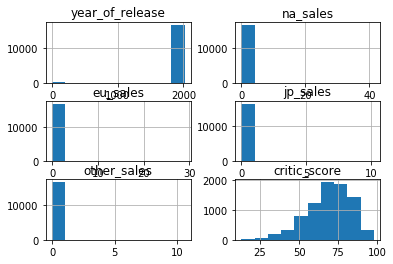

In [5]:
data.hist()
plt.show()

Can you please show me how to implement the whole data in subplot, I couldn't make it work.

The games are quite new the critic score is ranging from 0 to 100 and user score is in float number from 0 to 10 which is very similar.

In [6]:
data['user_score'] = data['user_score'].apply(lambda row: None if row == -1 else row)
data['critic_score'] = data['critic_score'].apply(lambda row: None if row == -1 else row)

In [7]:
data['user_score'] = np.floor(pd.to_numeric(data['user_score'], errors='coerce')).astype('Int64')
data['critic_score'] = np.floor(pd.to_numeric(data['critic_score'], errors='coerce')).astype('Int64')

In [8]:
data.stb.missing(style = True)

,missing,total,percent
user_score,"9,125","16,715",54.59%
critic_score,"8,578","16,715",51.32%
rating,"6,766","16,715",40.48%
name,2,"16,715",0.01%
genre,2,"16,715",0.01%
platform,0,"16,715",0.00%
year_of_release,0,"16,715",0.00%
na_sales,0,"16,715",0.00%
eu_sales,0,"16,715",0.00%
jp_sales,0,"16,715",0.00%


In [9]:
data.rating = data.rating.fillna('unknown')
data.replace('nan','NaN')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,<NA>,unknown
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,<NA>,unknown
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,<NA>,unknown
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,<NA>,<NA>,unknown
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,<NA>,unknown
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,<NA>,<NA>,unknown


In [10]:
data.replace('tbd','NaN')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,<NA>,unknown
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,<NA>,unknown
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,<NA>,unknown
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,<NA>,<NA>,unknown
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,<NA>,unknown
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,<NA>,<NA>,unknown


In [11]:
data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16715.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000,7590.000000
mean,1974.193599,0.263377,0.145060,0.077617,0.047342,68.967679,6.678656
std,252.559930,0.813604,0.503339,0.308853,0.186731,13.938165,1.516859
min,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.000000


na sales is the most profitable market as I can see than it's eu than it's other (rest of the world probably) and last jp.

In [12]:
data.describe(include = 'object')

,name,platform,genre,rating
count,16713,16715,16713,16715
unique,11559,31,12,9
top,Need for Speed: Most Wanted,PS2,Action,unknown
freq,12,2161,3369,6766


PS2 takes the lead platform (in sheer numbers), the genre action in the most popular, tbd is bad for me.

In [13]:
data.stb.freq(['platform'], style = True, cum_cols = False)

,platform,count,percent
0,PS2,"2,161",12.93%
1,DS,"2,151",12.87%
2,PS3,"1,331",7.96%
3,Wii,"1,320",7.90%
4,X360,"1,262",7.55%
5,PSP,"1,209",7.23%
6,PS,"1,197",7.16%
7,PC,974,5.83%
8,XB,824,4.93%
9,GBA,822,4.92%


In [14]:
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis = 1)
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,<NA>,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,<NA>,unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,<NA>,unknown,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,<NA>,<NA>,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,<NA>,unknown,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,<NA>,<NA>,unknown,0.01


In [15]:
df = data[['year_of_release', 'name']].groupby(['year_of_release']).count().sort_values(by = 'year_of_release').reset_index()
df =df[df['year_of_release'] != 0]
df

,year_of_release,name
1,1980,9
2,1981,46
3,1982,36
4,1983,17
5,1984,14
6,1985,14
7,1986,21
8,1987,16
9,1988,15
10,1989,17


There was a steady rise in number of games up to the 2008 - 2009 crisis that probably made many game companies bankrupt (or just canceling games).

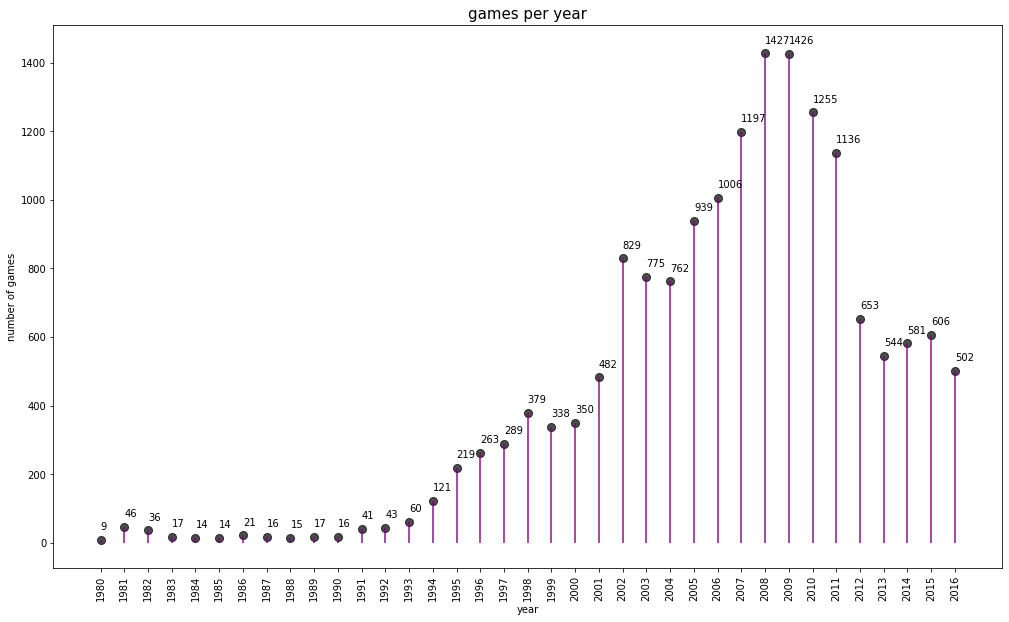

In [16]:
fig, ax = plt.subplots(figsize = (17, 10))
ax.vlines(x= df.year_of_release, ymin = 0, ymax = df.name, color = 'purple', alpha = 0.7, linewidth =2)
ax.scatter(x= df.year_of_release, y = df.name, s = 65, color = 'black', alpha = 0.7)
ax.set_title('games per year', fontdict = {'size' : 15})
ax.set_ylabel('number of games')
ax.set_xlabel('year')
ax.set_xticks(df.year_of_release)
ax.set_xticklabels(df.year_of_release, rotation = 90)
for row in df.itertuples():
    ax.text(row.year_of_release, row.name + 30, s = round(row.name, 2))
plt.show()

It's visual representation of games throughout the years.

In [17]:
df = data[['platform', 'total_sales']].groupby(['platform']).sum().sort_values(by = 'total_sales',ascending = False ).reset_index()
df

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


Some platforms have more sales than other (sometimes by a significant number).

In [18]:
df['sales_z'] = (df.total_sales - df.total_sales.mean()) / df.total_sales.std()

In [19]:
df

,platform,total_sales,sales_z
0,PS2,1255.77,2.780807
1,X360,971.42,1.964085
2,PS3,939.65,1.872834
3,Wii,907.51,1.780520
4,DS,806.12,1.489304
5,PS,730.86,1.273139
6,GBA,317.85,0.086875
7,PS4,314.14,0.076219
8,PSP,294.05,0.018516
9,PC,259.52,-0.080663


In [20]:
df['color'] = ['red' if x < 0 else 'green' for x in df.sales_z]

In [21]:
df

,platform,total_sales,sales_z,color
0,PS2,1255.77,2.780807,green
1,X360,971.42,1.964085,green
2,PS3,939.65,1.872834,green
3,Wii,907.51,1.780520,green
4,DS,806.12,1.489304,green
5,PS,730.86,1.273139,green
6,GBA,317.85,0.086875,green
7,PS4,314.14,0.076219,green
8,PSP,294.05,0.018516,green
9,PC,259.52,-0.080663,red


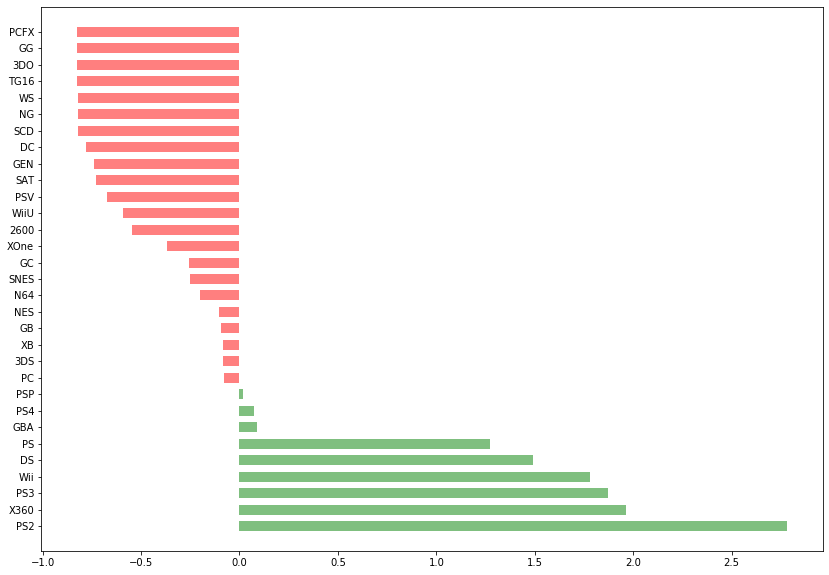

In [22]:
plt.figure(figsize = (14, 10))
plt.hlines(y = df.platform, xmax = df.sales_z, xmin = 0, color = df.color, alpha = 0.5, linewidth = 10)
plt.show()

The best way to show how the sales are significant.

In [23]:
data_new = data[data.year_of_release >= 2013]
data_new = data_new[data_new.platform != 'X360']
data_new = data_new[data_new.platform != 'PS3']
data_new = data_new[data_new.platform != 'DS']
data_new = data_new[data_new.platform != 'PSP']
data_new = data_new[data_new.platform != 'Wii']
data_new

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,<NA>,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,<NA>,<NA>,unknown,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,<NA>,<NA>,unknown,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4,E,8.58
...,...,...,...,...,...,...,...,...,...,...,...,...
16699,The Longest 5 Minutes,PSV,2016,Action,0.00,0.00,0.01,0.00,<NA>,<NA>,unknown,0.01
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,<NA>,unknown,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,<NA>,<NA>,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,<NA>,unknown,0.01


As I saw in the years chart it is the year games had a huge leap forward in matter of volume.

In [24]:
data_pivot = pd.pivot_table(data_new, index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum', fill_value = 0)
data_pivot

platform,3DS,PC,PS4,PSV,WiiU,XOne
year_of_release,,,,,,
2013,56.57,12.38,25.99,10.59,21.65,18.96
2014,43.76,13.28,100.00,11.90,22.03,54.07
2015,27.78,8.52,118.90,6.25,16.35,60.14
2016,15.14,5.25,69.25,4.25,4.60,26.15


In [25]:
dynamics = (data_pivot - data_pivot.shift(+1)).T
dynamics

year_of_release,2013,2014,2015,2016
platform,,,,
3DS,NaN,-12.81,-15.98,-12.64
PC,NaN,0.90,-4.76,-3.27
PS4,NaN,74.01,18.90,-49.65
PSV,NaN,1.31,-5.65,-2.00
WiiU,NaN,0.38,-5.68,-11.75
XOne,NaN,35.11,6.07,-33.99


The yearly change of platform in sales.

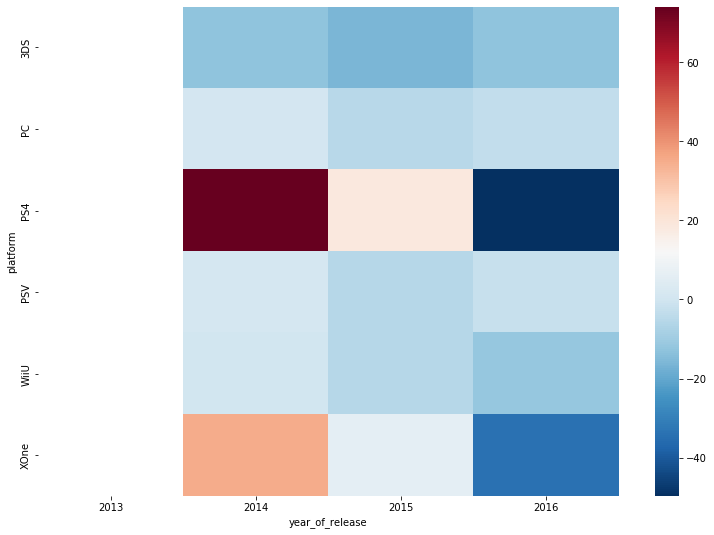

In [26]:
plt.figure(figsize = (13, 9))
sb.heatmap(dynamics, cmap = 'RdBu_r')
plt.show()

I would say that most platforms between 5-7 years of 'running'.
The leading platform as for 2014 - 2016 are PS4 & XOne.
And as far as I can see they all shrink, probably because they all come to the market at the same time (give ot take) and after a strong start they sell all the consules that are in immediate demand and than only lesser fans of gaming and perhaps people wating for the price to drop but it later on.

In [27]:
grouped = data_new.groupby(['platform', 'name'])['total_sales'].sum().reset_index()
grouped

,platform,name,total_sales
0,3DS,Beyblade Burst,0.03
1,3DS,Fire Emblem Fates,1.67
2,3DS,Frozen: Olaf's Quest,0.59
3,3DS,Haikyu!! Cross Team Match!,0.04
4,3DS,12-Sai. Honto no Kimochi,0.07
...,...,...,...
1599,XOne,XCOM 2,0.04
1600,XOne,ZombiU,0.01
1601,XOne,Zombie Army Trilogy,0.11
1602,XOne,Zoo Tycoon (2013),0.36


In [28]:
grouped['total_sales'].quantile(0.25)


0.03

In [29]:
grouped['total_sales'].quantile(0.75)

0.36000000000000004

In [30]:
grouped['total_sales']=np.where(grouped['total_sales'] < 0.09, 0.09, grouped['total_sales'])
grouped['total_sales']=np.where(grouped['total_sales'] > 0.65, 0.65, grouped['total_sales'])

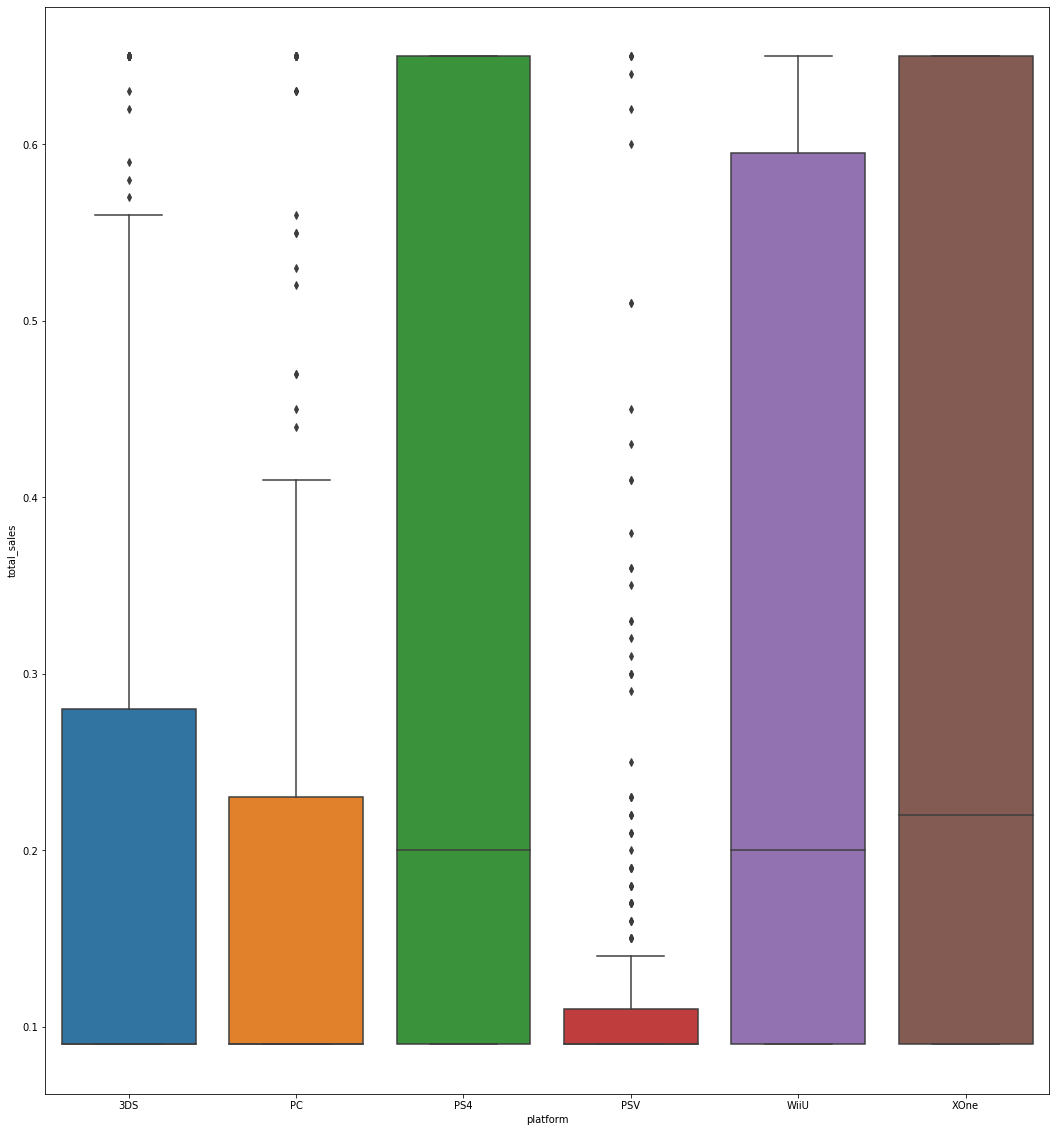

In [31]:
plt.figure(figsize = (18,20))
sb.boxplot( x = 'platform', y = "total_sales", data = grouped)
plt.show()

As we can observe XOne is the winner in terms of sales but many other platforms are making great sales too (in terms of platforms) an explanation for this can be that they are not all 'functioning' at the same time and there is a good competition between companies. PSV is nearing its end of life and 3DS is having a hard time competing because its major fan base is in jp region (small one).

In [32]:
grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1604 entries, 0 to 1603
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   platform     1604 non-null   object 
 1   name         1604 non-null   object 
 2   total_sales  1604 non-null   float64
dtypes: float64(1), object(2)
memory usage: 37.7+ KB


In [33]:
def score_effect(platform, scoring):
    data_clean = data_new.query('platform == @platform')[['total_sales', scoring]]
    sb.scatterplot(data = data_clean, x = scoring, y = 'total_sales')
    print(data_clean.corr())
    plt.show()

I had problem with changing the size of the scatterplot.

             total_sales  user_score
total_sales     1.000000   -0.027033
user_score     -0.027033    1.000000


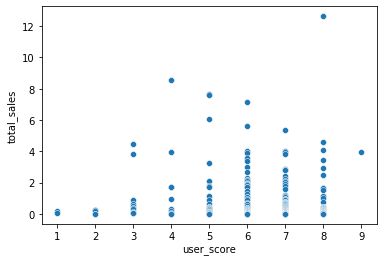

In [34]:
score_effect('PS4', 'user_score')

There is no evidence of correlation between PS4 sales & user_score.

              total_sales  critic_score
total_sales      1.000000      0.406568
critic_score     0.406568      1.000000


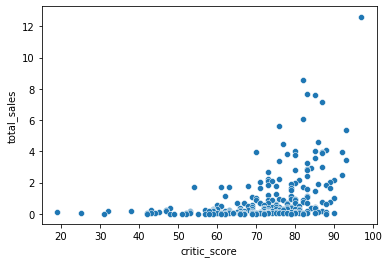

In [35]:
score_effect('PS4', 'critic_score')

There is no evidence of correlation between PS4 sales & critic_score.

             total_sales  user_score
total_sales     1.000000   -0.082483
user_score     -0.082483    1.000000


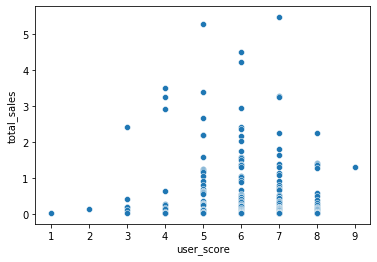

In [36]:
score_effect('XOne', 'user_score')

There is no evidence of correlation between XOne sales & user_score.

              total_sales  critic_score
total_sales      1.000000      0.416998
critic_score     0.416998      1.000000


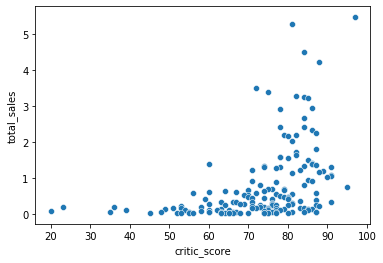

In [37]:
score_effect('XOne', 'critic_score')

There is no evidence of correlation between XOne sales & critic_score.

             total_sales  user_score
total_sales     1.000000    0.425957
user_score      0.425957    1.000000


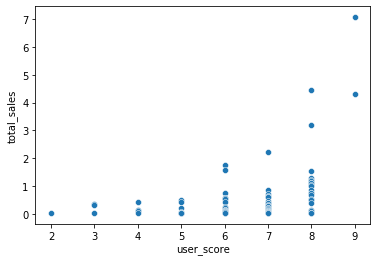

In [38]:
score_effect('WiiU', 'user_score')

There is no evidence of correlation between WiiU sales & user_score.

              total_sales  critic_score
total_sales      1.000000      0.376415
critic_score     0.376415      1.000000


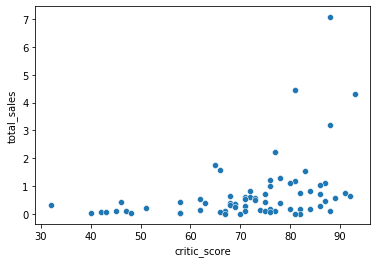

In [39]:
score_effect('WiiU', 'critic_score')

There is no evidence of correlation between WiiU sales & critic_score.

             total_sales  user_score
total_sales     1.000000    0.220791
user_score      0.220791    1.000000


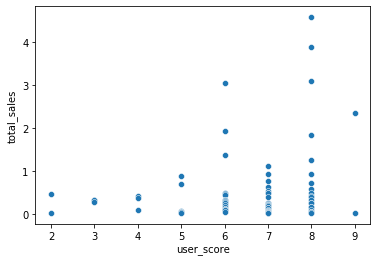

In [40]:
score_effect('3DS', 'user_score')

There is no evidence of correlation between 3DS sales & user_score.

              total_sales  critic_score
total_sales      1.000000      0.357057
critic_score     0.357057      1.000000


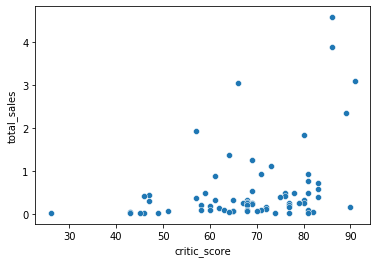

In [41]:
score_effect('3DS', 'critic_score')

There is no evidence of correlation between 3DS sales & critic_score.

             total_sales  user_score
total_sales     1.000000   -0.020752
user_score     -0.020752    1.000000


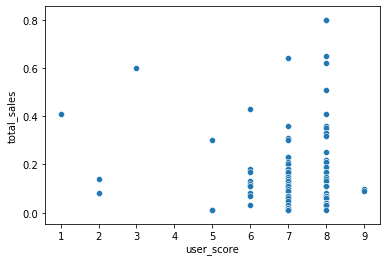

In [42]:
score_effect('PSV', 'user_score')

There is no evidence of correlation between PSV sales & user_score.

              total_sales  critic_score
total_sales      1.000000      0.254742
critic_score     0.254742      1.000000


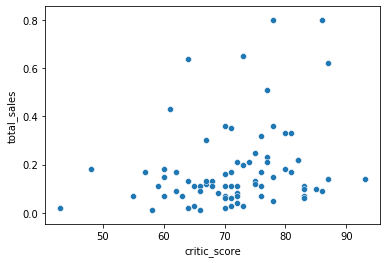

In [43]:
score_effect('PSV', 'critic_score')

There is no evidence of correlation between PSV sales & critic_score.

             total_sales  user_score
total_sales      1.00000    -0.10828
user_score      -0.10828     1.00000


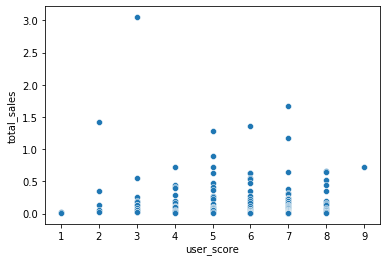

In [44]:
score_effect('PC', 'user_score')

There is no evidence of correlation between PC sales & user_score.

              total_sales  critic_score
total_sales       1.00000       0.19603
critic_score      0.19603       1.00000


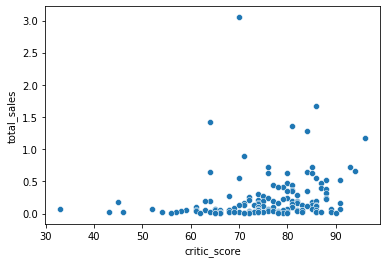

In [45]:
score_effect('PC', 'critic_score')

There is no evidence of correlation between PC sales & critic_score.

In [46]:
data_new_genre = data_new.groupby(['genre'])['total_sales'].sum().sort_values(ascending=False).reset_index()
data_new_genre.head()

,genre,total_sales
0,Action,199.18
1,Shooter,165.71
2,Role-Playing,123.94
3,Sports,90.67
4,Misc,34.66


In [47]:
data_new_genre.tail()

,genre,total_sales
7,Fighting,26.69
8,Simulation,19.81
9,Adventure,16.48
10,Strategy,8.91
11,Puzzle,3.13


It's seems that fast pacing games have the largest earning by a massive amount compared with the bottom genres that are slower and demand thought.

In [48]:
data_new1 = data_new.groupby(['platform'])['na_sales'].sum().sort_values(ascending=False).reset_index()
data_new1.head()

,platform,na_sales
0,PS4,108.74
1,XOne,93.12
2,3DS,38.20
3,WiiU,29.21
4,PC,11.11


The top 5 salers in na region.

In [49]:
data_new2 = data_new.groupby(['platform'])['eu_sales'].sum().sort_values(ascending=False).reset_index()
data_new2.head()

,platform,eu_sales
0,PS4,141.09
1,XOne,51.59
2,3DS,30.96
3,PC,25.36
4,WiiU,19.85


The top 5 salers in eu region i quite similar to na.

In [50]:
data_new3 = data_new.groupby(['platform'])['jp_sales'].sum().sort_values(ascending=False).reset_index()
data_new3.head()

,platform,jp_sales
0,3DS,67.81
1,PSV,18.59
2,PS4,15.96
3,WiiU,10.88
4,XOne,0.34


The top 5 salers in jp region is different than the rest in priority.

In [51]:
data_new4 = data_new.groupby(['genre'])['na_sales'].sum().sort_values(ascending=False).reset_index()
data_new4.head()

,genre,na_sales
0,Shooter,75.37
1,Action,73.43
2,Role-Playing,37.92
3,Sports,37.09
4,Platform,14.18


The top 5 salers in na region.

In [52]:
data_new5 = data_new.groupby(['genre'])['eu_sales'].sum().sort_values(ascending=False).reset_index()
data_new5.head()

,genre,eu_sales
0,Action,73.96
1,Shooter,64.89
2,Sports,38.63
3,Role-Playing,32.00
4,Racing,15.18


There are some differences compared with na.

In [53]:
data_new6 = data_new.groupby(['genre'])['jp_sales'].sum().sort_values(ascending=False).reset_index()
data_new6.head()

,genre,jp_sales
0,Role-Playing,44.84
1,Action,29.87
2,Misc,8.27
3,Fighting,5.33
4,Platform,4.75


Again, jp region is unique and has Role-Playing as its top seller and platform in a 'respectable' place.

In [54]:
data_new7 = data_new.groupby(['rating'])['na_sales'].mean().sort_values(ascending=False).reset_index()
data_new7.head()

,rating,na_sales
0,M,0.380588
1,E,0.254223
2,E10+,0.181180
3,T,0.147353
4,unknown,0.094470


The top 5 salers in na region.

In [55]:
data_new8 = data_new.groupby(['rating'])['eu_sales'].mean().sort_values(ascending=False).reset_index()
data_new8.head()

,rating,eu_sales
0,M,0.370627
1,E,0.281553
2,E10+,0.147753
3,T,0.136975
4,unknown,0.087400


The same as na

In [56]:
data_new9 = data_new.groupby(['rating'])['jp_sales'].mean().sort_values(ascending=False).reset_index()
data_new9.head()

,rating,jp_sales
0,unknown,0.100371
1,E,0.064369
2,T,0.056807
3,M,0.032039
4,E10+,0.031798


And as always jp has its own preference system.

In [57]:
data_new10 = data_new.groupby(['name'])['total_sales'].sum().sort_values(ascending=False).reset_index()
data_new10.head()

,name,total_sales
0,Call of Duty: Black Ops 3,22.28
1,Grand Theft Auto V,19.26
2,Pokemon X/Pokemon Y,14.60
3,Call of Duty: Advanced Warfare,13.33
4,Fallout 4,12.67


How does 'try to to analyse games without rating' contribute me?

In [72]:
data_new['user_score'] = data_new['user_score'].replace('tbd', 0)
data_new.user_score = data_new.user_score.astype(float)

In [78]:
pc_data = data_new.query('platform == "PC"')
xone_data = data_new.query('platform == "XOne"')
sample0 = pc_data.user_score                      
sample1 = xone_data.user_score

H0: The average user ratings of the Xbox One and PS4 platforms are the same.
    
H1: The average user ratings of the Xbox One and PS4 platforms are differ.

In [79]:
p_value = stats.ttest_ind(sample0, sample1, nan_policy = 'omit').pvalue
alpha = 0.05
print(p_value)
if p_value < alpha:
    print('Reject hypotheses: The average user ratings of the Xbox One and PS4 platforms are differ.')
else:
    print('Fail to reject hypotheses: The average user ratings of the Xbox One and PS4 platforms are the same.')

0.0017808639441936436
Reject hypotheses: The average user ratings of the Xbox One and PS4 platforms are differ.


In [82]:
data_new_a = data_new.query('genre == "Action"')
data_new_s = data_new.query('genre == "Sports"')
sample0 = data_new_a.user_score                      
sample1 = data_new_s.user_score

H0: The average user ratings of the genres action and sports is differ.

H1: The average user ratings of the genres action and sports are the same.

In [83]:
p_value = stats.ttest_ind(sample0, sample1, nan_policy = 'omit').pvalue
alpha = 0.05
print(p_value)
if p_value < alpha:
    print('Reject hypotheses: The average user ratings of the genres action and sports are the same.')
else:
    print("Fail to reject hypotheses: The average user ratings of the genres action and sports is differ.")

1.363480608908181e-13
Reject hypotheses: The average user ratings of the genres action and sports are the same.


# Conclusion
After the investigation several outcomes have been revealed:
1. The jp region is unique compared with na and eu regions which are more similar in 'taste' of platform & genre. There should be an emphasis on role playing with the rating of E and T for the 3DS and PSV platforms.

2. Action and shooter games with the rating of M is for the rest of the regions they will be most profitable for the PS4 and XOne platforms.

3. User & critic score does not affect sales on platforms & the games' genres.

## Overall
There are alot of diffrent reasons for people in different regions to buy games and platforms. World crysis, critic and user score, marketing (which is not written but is always important for sales), and buying locally is important (all PS are japanese (jp region) and all X are american (na region) there are more but these popular consules are 'staring' in the data).